In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as st

import sklearn
from sklearn import pipeline  ,ensemble 
from sklearn.pipeline import Pipeline 
from sklearn import impute
from sklearn import compose
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix,roc_auc_score
from sklearn import set_config
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer,PowerTransformer,QuantileTransformer, RobustScaler,StandardScaler,LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.tree          import DecisionTreeClassifier
from sklearn.linear_model  import LogisticRegression    
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram') # Useful for display the pipeline
print("Pandas  ", pd.__version__)
print("Sklearn ", sklearn.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


## Dataset :

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
- The dataset consists of 10 numerical and 8 categorical attributes. 
- The 'Revenue' attribute can be used as the class label

## Attribute :

- Revenue => class whether it can make a revenue or not
- Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration => represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- Bounce Rate => percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
- Exit Rate => the percentage that were the last in the session
- Page Value => feature represents the average value for a web page that a user visited before completing an e-commerce transaction
- Special Day => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
- Operating system,browser, region, traffic type => Different types of operating systems, browser, region and traffic type used to visit the website
- Visitor type => Whether the customer is a returning or new visitor
- Weekend => A Boolean value indicating whether the date of the visit is weekend
- Month => Month of the year

## Project Description

### The Client: Sedora

Sedora is a rapidly expanding online shopping busines. It has attracted lots of attention in Turkey and they are looking to expand to the european market. They accomplished all that based on understanding their clients and knowing what they want and when they want it.

### What is missing
- They had  success until this point by knowing their local clients.
This success has proven very useful to keep the buisness blooming in Turkey but is not enough for the grand expansion that they plan.

- In order to make this expansion fireproof they need to secure some VC investment, but money doesnt come easy. They plan on convincing their new investors by proving they can secure sales and revenue by integrating a system that understand when people buy their products and what are the determing factors.

### The Objective
- Build a machine learning product that is able to predict if a customer is going to make a purchase
- Understand which were the determinig factors that pushed customers to make a purchase
- Build a visual representation of the previous two points that Sedora can show the potential investors the results and impress them.

### The Data
- You will be working with 12k rows of data collected from customers taht logged into the site
- This data contains some key factors like session time and if the customer was a returning customer or not
- The data is heavily skewed so make sure you find a solution that works for both situations, if they make a purchase or if they didn't.


# Column Descriptions:
** Administrative **: This is the number of pages of this type (administrative) that the user visited.

** Administrative_Duration **: This is the amount of time spent in this category of pages.

** Informational **: This is the number of pages of this type (informational) that the user visited.

** Informational_Duration **: This is the amount of time spent in this category of pages.

** ProductRelated **: This is the number of pages of this type (product related) that the user visited.

** ProductRelated_Duration **: This is the amount of time spent in this category of pages.

** BounceRates **: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

** ExitRates ** : The percentage of pageviews on the website that end at that specific page.

** PageValues ** The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

** SpecialDay **: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

** Month **: Contains the month the pageview occurred, in string form.

** OperatingSystems **: An integer value representing the operating system that the user was on when viewing the page.

** Browser **: An integer value representing the browser that the user was using to view the page.

**Region **: An integer value representing which region the user is located in.

**TrafficType **: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

** VisitorType **: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

** Weekend **: A boolean representing whether the session is on a weekend.

** Revenue **: A boolean representing whether or not the user completed the purchase.



In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

### Skewnss:

In [3]:
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                  

In [4]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


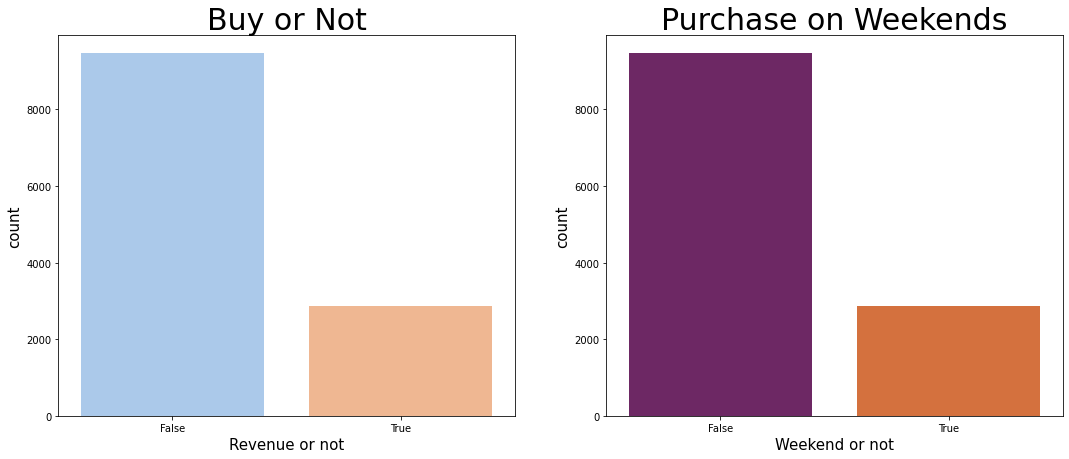

In [ ]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

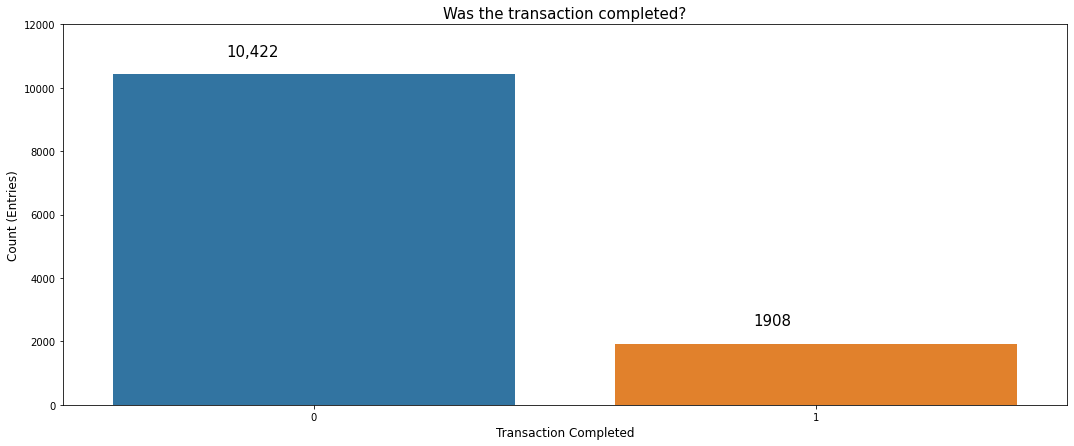

In [ ]:
sns.countplot(df_edit['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

In [ ]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

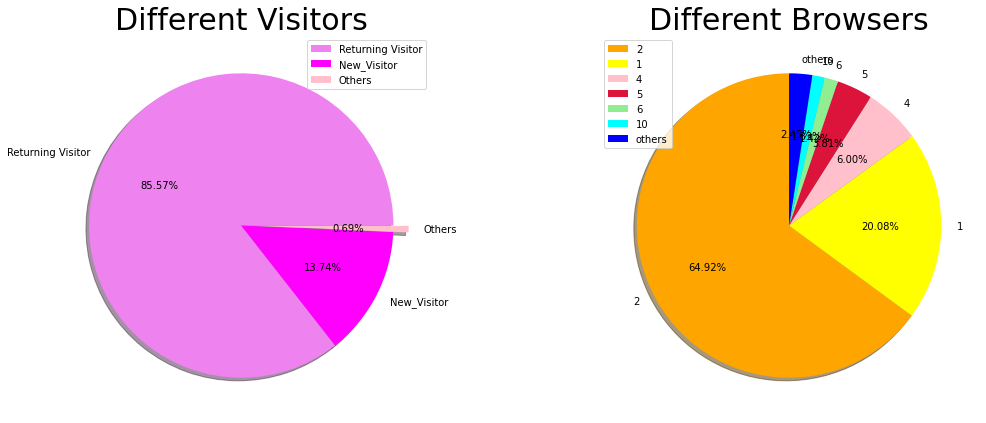

In [ ]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

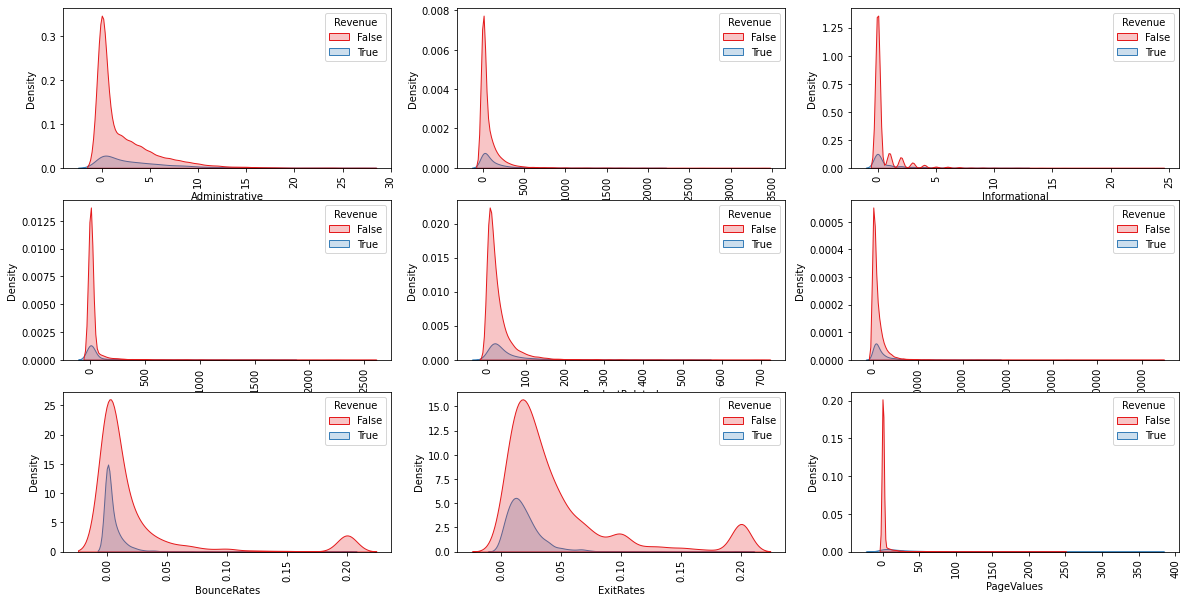

In [ ]:
plt.figure(figsize=(20,10))
for i, col in enumerate(num):
    plt.subplot(3,3, i+1)
    sns.kdeplot(data = df, x= col,hue = 'Revenue', palette = 'Set1', fill = True)
    plt.xticks(rotation = 90)

In [ ]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

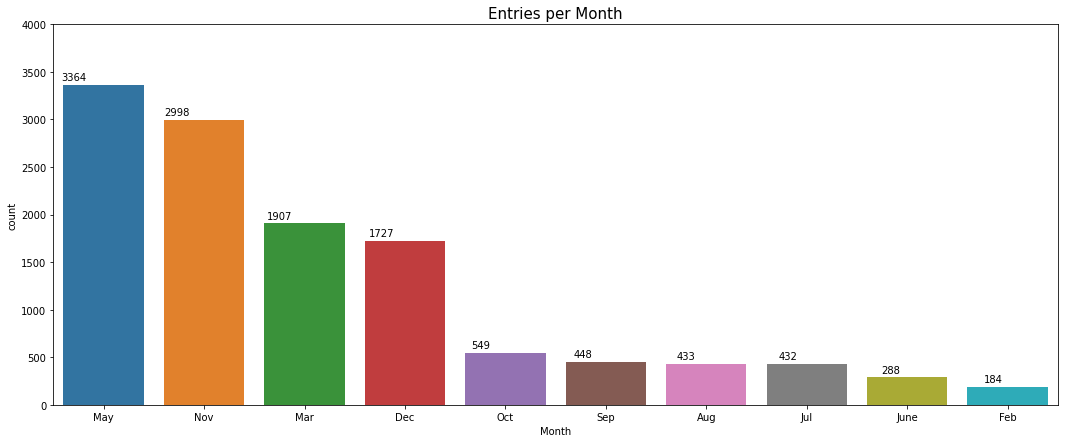

In [ ]:
monthly = df['Month'].value_counts()

sns.countplot(df['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

# Preprocessing

# Pipeline 

In [23]:
num=["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated" ,"ProductRelated_Duration","BounceRates", "ExitRates" ,"PageValues" ]

cat=['VisitorType']

In [25]:
df=df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'],axis=1)

KeyError: "['Month' 'Browser' 'OperatingSystems' 'Region' 'TrafficType' 'Weekend'] not found in axis"

In [34]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType',
       'Revenue'],
      dtype='object')

In [39]:
df['Administrative_Duration']=1/(df['Administrative_Duration']+1)
df['BounceRates']= df['BounceRates']**0.2 
df['ExitRates']=df['ExitRates']**0.2 


In [26]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000


In [35]:
num_4_Models = pipeline.Pipeline(steps=[
    # ('scalar',StandardScaler()),
    ('Normalizer',RobustScaler()),
    # ('PowerTransformer',PowerTransformer()) 
])
cat_4_Models = pipeline.Pipeline(steps=[
  ('onehot', OneHotEncoder( handle_unknown='ignore'))
])

preprocessor = compose.ColumnTransformer(transformers=[
    ('num', num_4_Models, num),
    ('cat', cat_4_Models, cat),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Normalizer',
                                                  RobustScaler())]),
                                 ['Administrative', 'Administrative_Duration',
                                  'Informational', 'Informational_Duration',
                                  'ProductRelated', 'ProductRelated_Duration',
                                  'BounceRates', 'ExitRates', 'PageValues']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['VisitorType'])])

# Models

In [28]:

classifier_models = {
"DecisionTreeClassifier": DecisionTreeClassifier(),
'KNeighborsClassifier':KNeighborsClassifier(6),
'LogisticRegression':LogisticRegression(),
"RandomForestClassifier":ensemble.RandomForestClassifier(),
"AdaBoostClassifier":ensemble.AdaBoostClassifier(),
"GradientBoostingClassifier":ensemble.GradientBoostingClassifier(),
"XGBClassifier":XGBClassifier(),
"LGBMClassifier":LGBMClassifier(),
"CatBoostClassifier":CatBoostClassifier(),

}
# make pipline with  preprocessing 
classifier_models = {name: pipeline.make_pipeline(preprocessor, model) for name, model in classifier_models.items()}
classifier_models["GradientBoostingClassifier"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Normalizer',
                                                                   RobustScaler()),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['VisitorType'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

# Checking Models

In [40]:

x=df.drop(['Revenue'],axis=1)
y=df['Revenue']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42 )

In [42]:
results = pd.DataFrame({ 'Model': [],'Accuracy': [], 'Bal Acc.': [],'Time': []})

In [43]:


for model_name, model in classifier_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    total_time = time.time() - start_time
    valid_pred = model.predict(X_test)
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_test, valid_pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_test, valid_pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

1:	learn: 0.6344318	total: 8.59ms	remaining: 4.29s
2:	learn: 0.6087203	total: 12.8ms	remaining: 4.27s
3:	learn: 0.5841144	total: 16.9ms	remaining: 4.2s
4:	learn: 0.5608898	total: 21.1ms	remaining: 4.21s
5:	learn: 0.5392169	total: 25.4ms	remaining: 4.21s
6:	learn: 0.5188363	total: 29.6ms	remaining: 4.2s
7:	learn: 0.4987017	total: 33.9ms	remaining: 4.21s
8:	learn: 0.4820131	total: 38.3ms	remaining: 4.21s
9:	learn: 0.4670080	total: 42.7ms	remaining: 4.22s
10:	learn: 0.4516202	total: 47.1ms	remaining: 4.24s
11:	learn: 0.4383385	total: 51.7ms	remaining: 4.25s
12:	learn: 0.4266697	total: 56.2ms	remaining: 4.26s
13:	learn: 0.4150742	total: 60.6ms	remaining: 4.27s
14:	learn: 0.4049506	total: 65.1ms	remaining: 4.27s
15:	learn: 0.3956062	total: 69.4ms	remaining: 4.27s
16:	learn: 0.3852215	total: 74ms	remaining: 4.28s
17:	learn: 0.3761510	total: 79ms	remaining: 4.31s
18:	learn: 0.3680338	total: 82.3ms	remaining: 4.25s
19:	learn: 0.3614981	total: 87.4ms	remaining: 4.28s
20:	learn: 0.3540314	total:

,Model,Accuracy,Bal Acc.,Time
1,RandomForestClassifier,89.321438,74.521099,1.175576
2,GradientBoostingClassifier,89.267370,74.772894,1.346076
3,CatBoostClassifier,89.132198,74.834771,7.674654
4,LGBMClassifier,88.942958,74.226076,0.546237
5,LogisticRegression,88.861855,76.377554,0.380524
6,XGBClassifier,88.753717,74.326894,1.457477
7,AdaBoostClassifier,88.564477,75.491984,0.499126
8,KNeighborsClassifier,88.456340,70.958025,0.165673
9,DecisionTreeClassifier,85.050014,72.843707,0.200573


In [58]:
from sklearn.metrics import classification_report,confusion_matrix
#with the best  paramaters
classifier=ensemble.RandomForestClassifier(max_depth=3, random_state=10, n_estimators=500)
tuning_model=Pipeline(steps=[('preprocessor', preprocessor),('classifier',classifier )])
tuning_model.fit(X_train,y_train)
pred=tuning_model.predict(X_test)
print("model score: %.3f" % tuning_model.score(X_test, y_test))
print(classification_report(y_test, pred))
print()
print(confusion_matrix(y_test, pred))

model score: 0.876
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3124
           1       0.90      0.23      0.37       575

    accuracy                           0.88      3699
   macro avg       0.89      0.61      0.65      3699
weighted avg       0.88      0.88      0.84      3699


[[3110   14]
 [ 443  132]]


In [59]:
param_grid = { 
    'classifier__n_estimators': [100,150,200,500,700,750,800,850],

    'classifier__max_depth' : [1,2,3,4,5,6,7,8,9,10],
   }# 'classifier__criterion' :['friedman_mse','mse']
from sklearn.model_selection import GridSearchCV
test = Pipeline(steps=[('preprocessor', preprocessor),('classifier', ensemble.RandomForestClassifier())])
CV = GridSearchCV(test,param_grid,  n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__max_depth': 6, 'classifier__n_estimators': 100}
0.9008238051370068


# Anlaysis Data  again 

In [ ]:
df_edit.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,6.651987,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,10.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,11.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


# Skew check  and Kurtosis

In [ ]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [ ]:
df.kurtosis()

Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

# Distribution of all numerical columns

In [ ]:
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

array([[<AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>],
       [<AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>]], dtype=object)

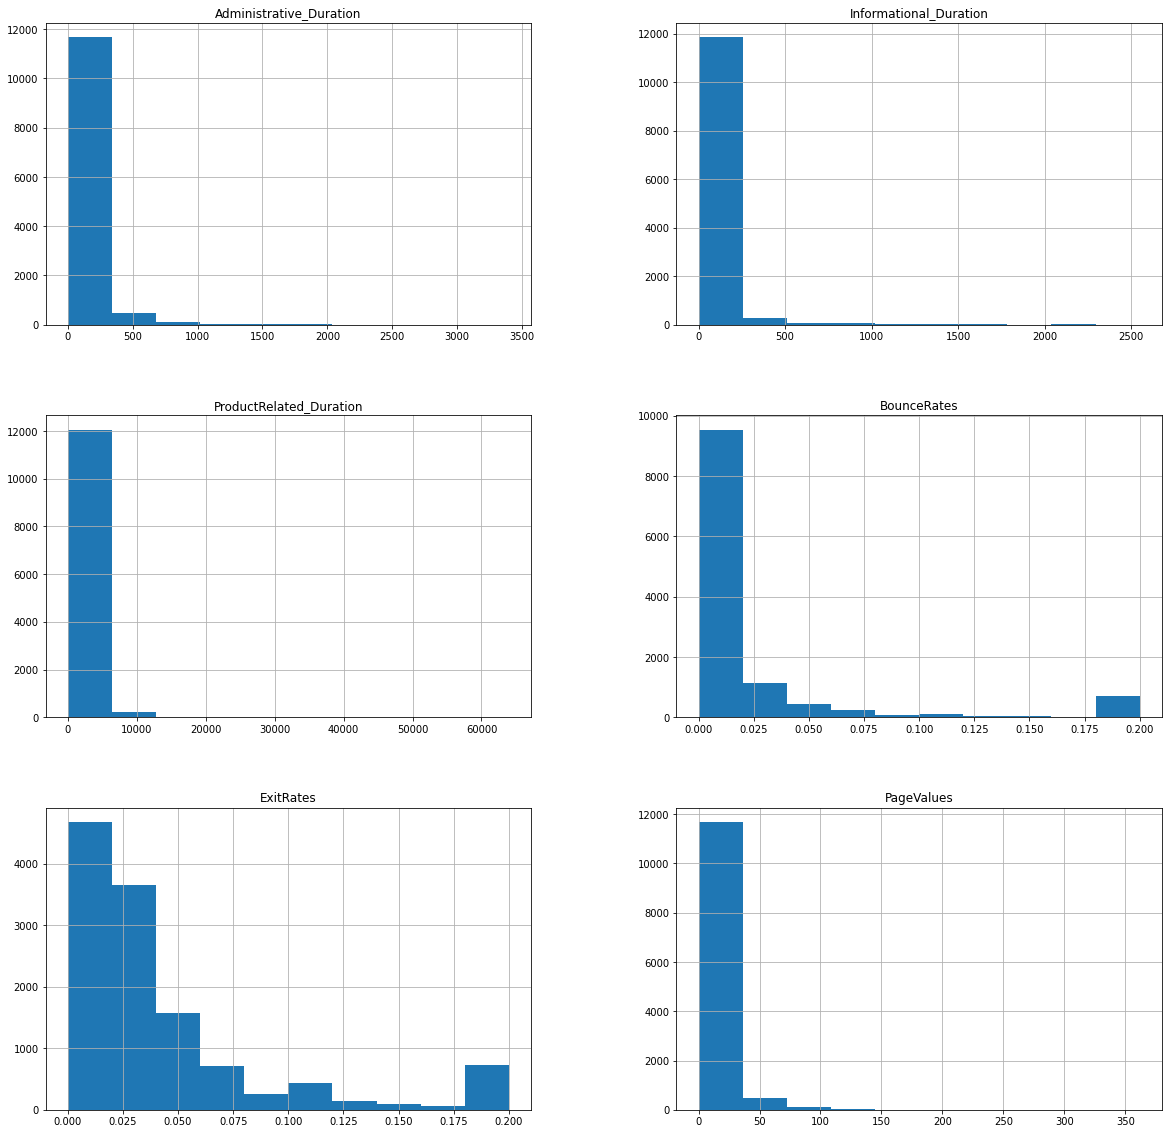

In [ ]:
df.hist(column=num_col,figsize=(20,20))

Text(0, 0.5, '')

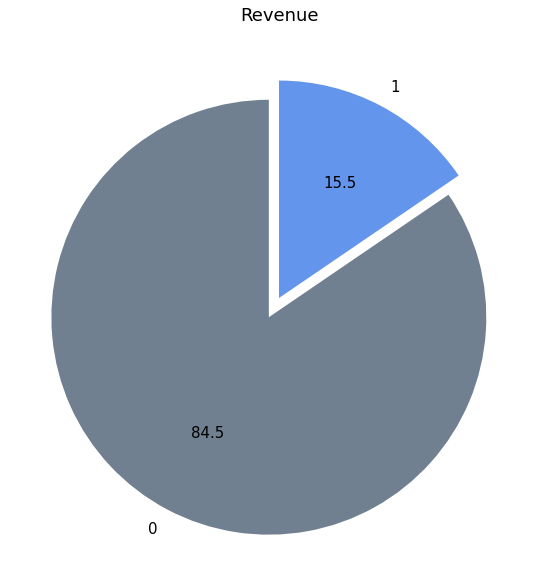

In [ ]:
plt.figure(figsize=(10,10))
df_edit['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

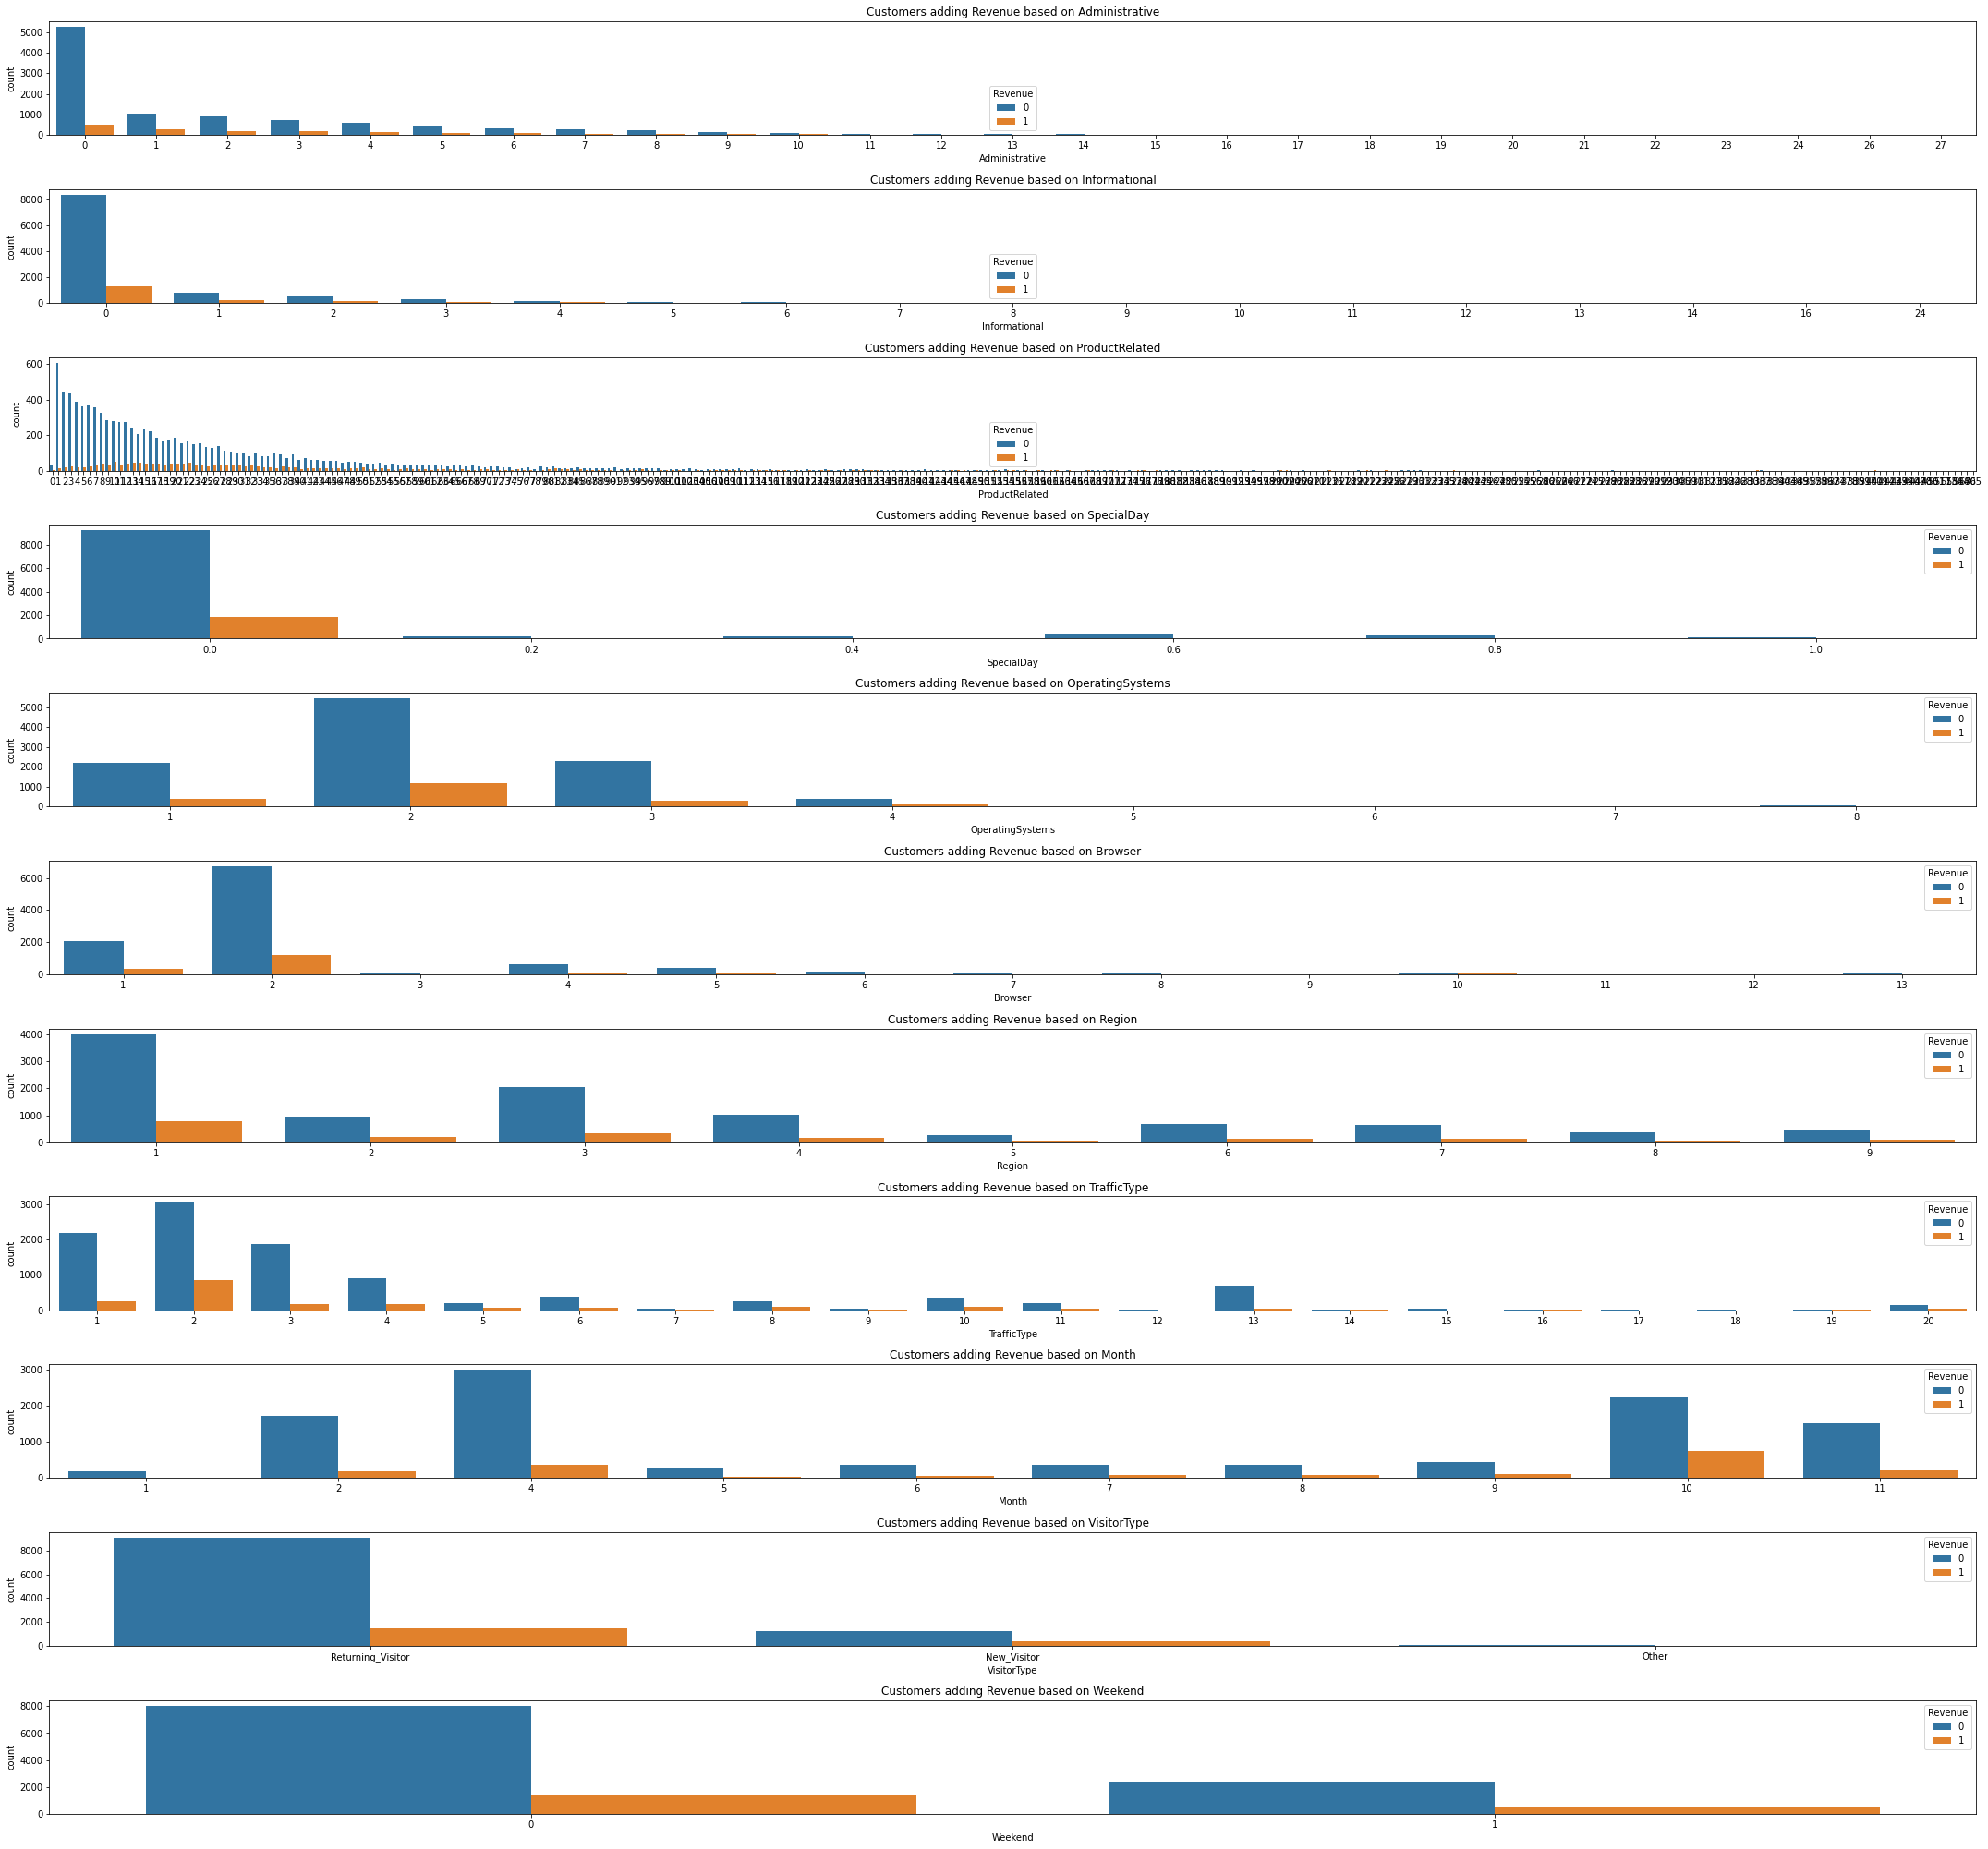

In [ ]:
columns=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(30,30))
plot_number = 0
for i in columns:
    plot_number = plot_number + 1
    ax = plt.subplot(12, 1, plot_number,adjustable='datalim')
    sns.countplot(df_edit[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=707b3354-6a36-4a18-95db-18b654efe088' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>